# LAB 6 Quadratic Equation - Classic - Po Shen Loh

Diego Alejandro Alvarado Chaparro

In [66]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
  return x**2

def f2(x):
  return (x-1)**2

def f3(x):
  return x**2 - 1

def f4(x):
  return x**2 + 1

fun_strs = ["f(x) = ", "x^2", "(x-1)^2", "x^2 - 1", "x^2 + 1"]

## PUNTO 1

In [67]:
def plot_fun(fun, i, a=-2.0, b=2.0):
  x = np.linspace(a,b,100)
  fig, ax = plt.subplots()
  ax.plot(x,fun(x))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x)=' + fun_strs[i])
  plt.xlabel('x')
  plt.ylabel('f(x)')


### $x^{2}$


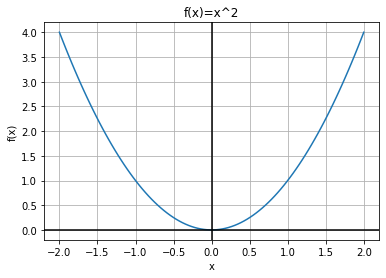

In [68]:
plot_fun(f1,1);

### $(x-1)^2$

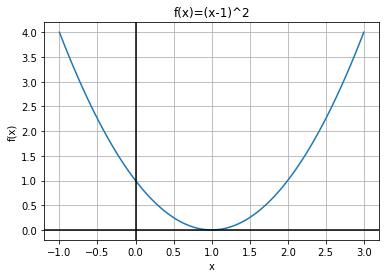

In [69]:
plot_fun(f2, 2,-1.0,3.0)

### $x^2 -1$

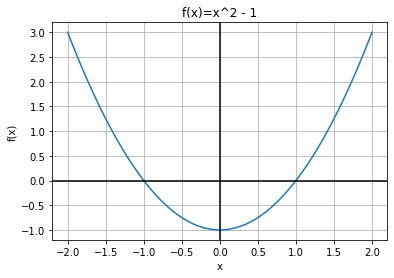

In [70]:
plot_fun(f3,3)

### $x^2 + 1$

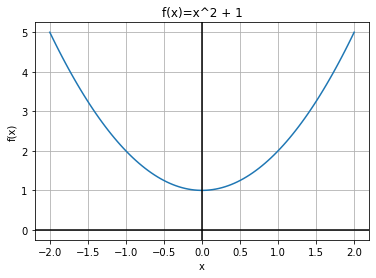

In [71]:
plot_fun(f4,4)

## PUNTO 2

### Método Clásico

In [72]:
def clasico(B,C):
  u = math.sqrt(abs(B**2 - 4*C))
  if (B**2 - 4*C >= 0):
    return [(-B+u)/2, (-B-u)/2]
  else:
    return [complex(-B/2,u/2), complex(-B/2, -u/2)]

### Método Po Shen Loh

In [73]:
def po_shen_loh(B,C):
  u = math.sqrt(abs((B**2)/4 - C))
  if ((B**2)/4 - C >= 0):
    return [-B/2.0 + u, -B/2.0 - u]
  else:
    return [complex(-B/2.0,u), complex(-B/2.0, -u)]

### $x^2$

In [74]:
res = clasico(0,0)
print("Raíces usando el método clásico:", res[0], ",", res[1])
res = po_shen_loh(0,0)
print("Raíces usando el método Po Shen Loh:", res[0], ",", res[1])

Raíces usando el método clásico: 0.0 , 0.0
Raíces usando el método Po Shen Loh: 0.0 , 0.0


### $(x-1)^2 = x^2 - 2x + 1$

In [75]:
res = clasico(-2,1)
print("Raíces usando el método clásico:", res[0], ",", res[1])
res = po_shen_loh(-2,1)
print("Raíces usando el método Po Shen Loh:", res[0], ",", res[1])

Raíces usando el método clásico: 1.0 , 1.0
Raíces usando el método Po Shen Loh: 1.0 , 1.0


### $x^2 - 1$

In [76]:
res = clasico(0,-1)
print("Raíces usando el método clásico:", res[0], ",", res[1])
res = po_shen_loh(0,-1)
print("Raíces usando el método Po Shen Loh:", res[0], ",", res[1])

Raíces usando el método clásico: 1.0 , -1.0
Raíces usando el método Po Shen Loh: 1.0 , -1.0


### $x^2 + 1$

In [77]:
res = clasico(0,1)
print("Raíces usando el método clásico:", res[0], ",", res[1])
res = po_shen_loh(0,1)
print("Raíces usando el método Po Shen Loh:", res[0], ",", res[1])

Raíces usando el método clásico: 1j , -1j
Raíces usando el método Po Shen Loh: 1j , -1j


## PUNTO 3

In [98]:
def df1(x):
  return 2*x

def df2(x):
  return 2*x - 2

def df3(x):
  return 2*x

def df4(x):
  return 2*x

In [128]:
# Código del repositorio github de https://github.com/gjhernandezp/algorithms/blob/master/NewtonFractals/newtonfractalz2_1.ipynb
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, f=1, df=1, r1=0, r2=0):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, f=1, df=1, r1=0, r2=0, f_str=""):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, f=f, df=df, r1=r1, r2=r2)
    plt.title('Newton Fractal f(x)='+f_str)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

### $x^2$

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


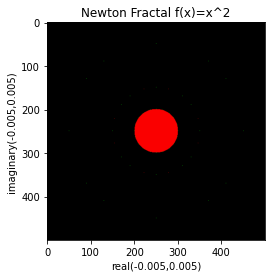

In [126]:
display1(zoom=0.01, f=f1, df=df1, r1=0, r2=0, f_str=fun_strs[1])

### $(x-1)^2$

Z region from ( 0.991 , -0.005 ) to ( 1.001 , 0.005 )


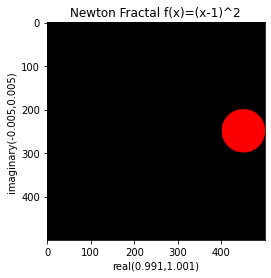

In [159]:
display1(0.996,0, zoom=0.01, f=f2, df=df2, r1=1, r2=1, f_str = fun_strs[2])

### $x^2 - 1$

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


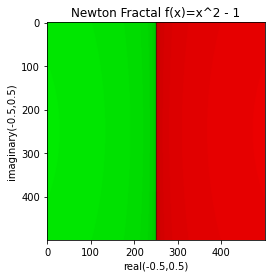

In [147]:
display1(0,0, zoom=1, f=f3, df=df3, r1=1, r2=-1, f_str = fun_strs[3])

### $x^2 + 1$

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


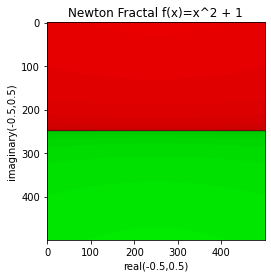

In [160]:
display1(0,0, zoom=1, f=f4, df=df4, r1=1j, r2=-1j, f_str = fun_strs[4])

## PUNTO 4

In [170]:
def newton_iterations(a, b, f, df):
  z= complex(a,b)
  r=[]
  i=[]
  for k in range(50):
    dz = df(z)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z=' + str(a) + ' + ' + str(b) + 'j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

### $x^2$

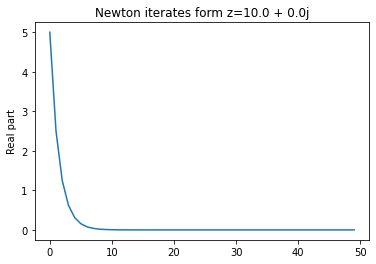

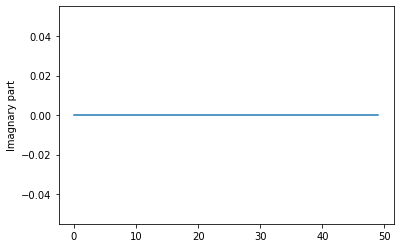

In [173]:
newton_iterations(10.0,0.0,f1,df1)

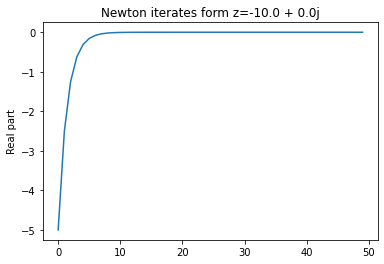

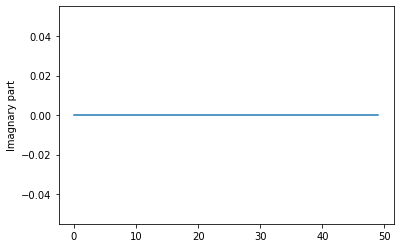

In [174]:
newton_iterations(-10.0,0.0,f1,df1)

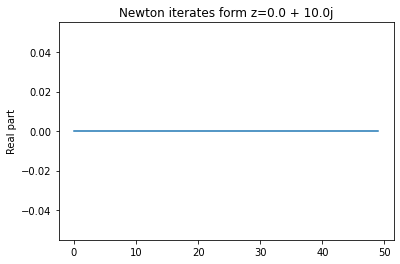

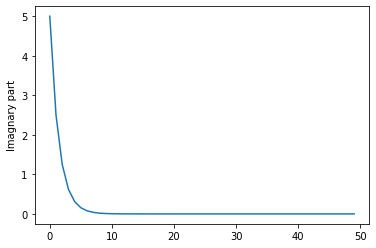

In [175]:
newton_iterations(0.0,10.0,f1,df1)

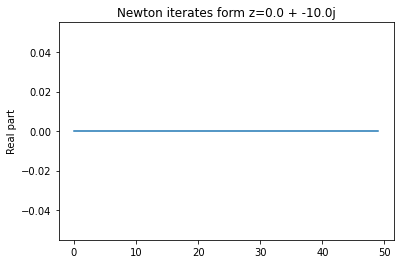

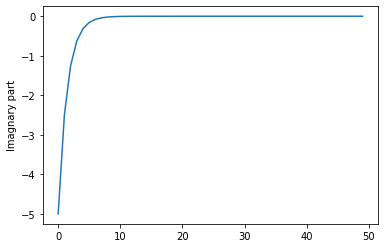

In [176]:
newton_iterations(0.0,-10.0,f1,df1)

Le toma menos de 10 iteraciónes converger a la única raíz (0) en los 4 casos.

### $(x-1)^2$

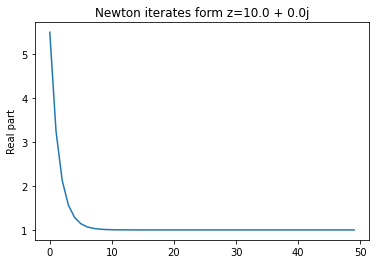

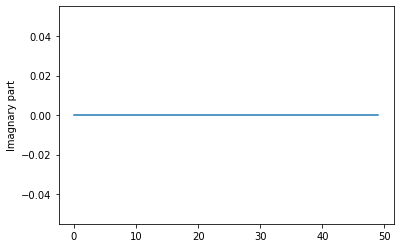

In [177]:
newton_iterations(10.0,0.0,f2,df2)

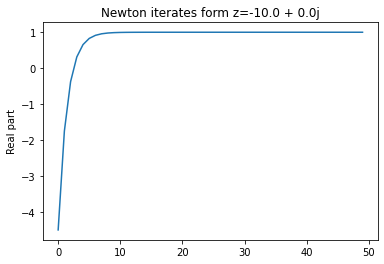

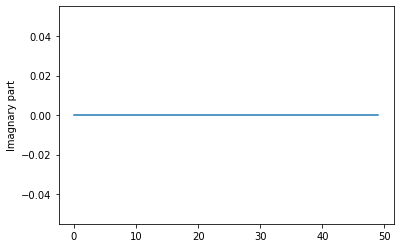

In [181]:
newton_iterations(-10.0,0.0,f2,df2)

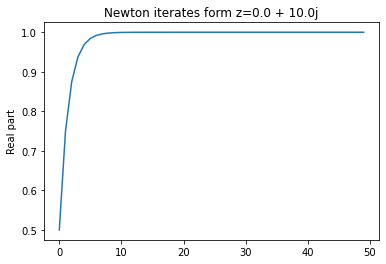

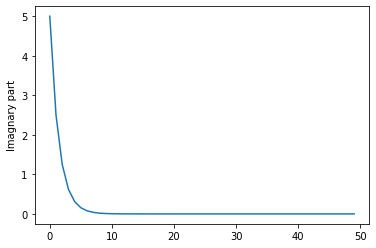

In [183]:
newton_iterations(0.0,10.0,f2,df2)

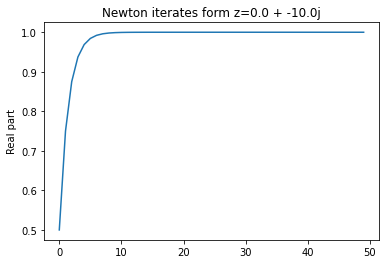

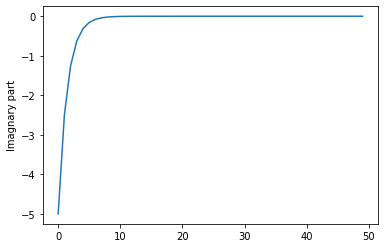

In [184]:
newton_iterations(0.0,-10.0,f2,df2)

De nuevo, le toma menos de 10 iteraciones converger a la única raíz (1) en los cuatro casos.

### $x^2 - 1$

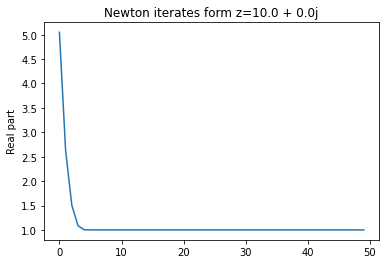

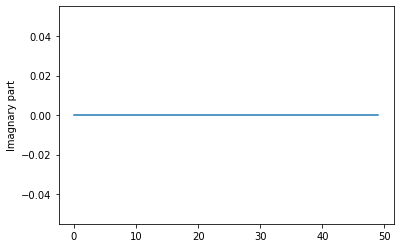

In [185]:
newton_iterations(10.0,0.0,f3,df3)

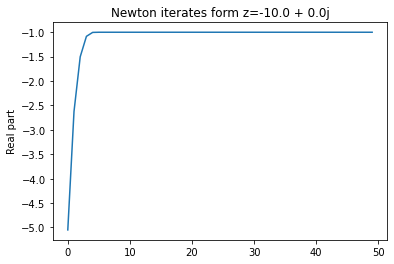

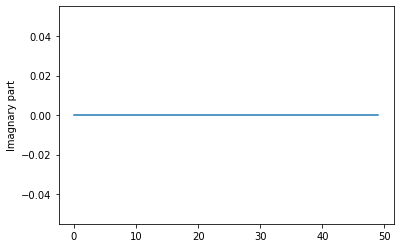

In [186]:
newton_iterations(-10.0,0.0,f3,df3)

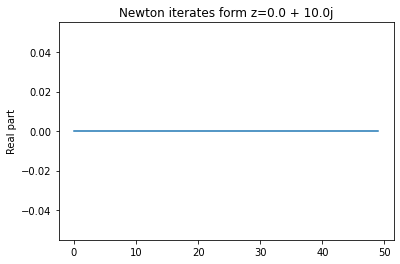

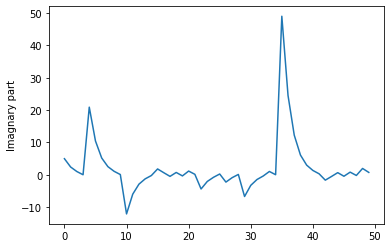

In [187]:
newton_iterations(0.0,10.0,f3,df3)

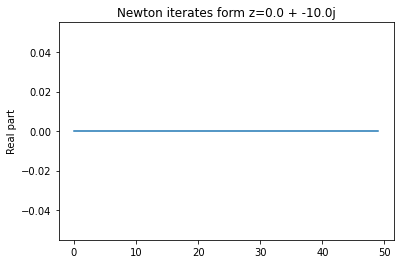

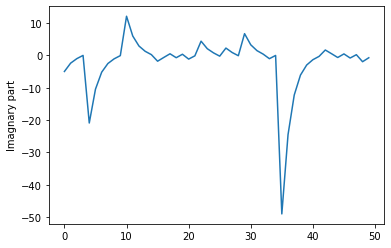

In [188]:
newton_iterations(0.0,-10.0,f3,df3)

En este caso ocurre que empezando con 10 converge a 1 y empezando desde -10 converge a -1, pero cuando se empieza por i ó -i no converge y varia la parte compleja de la raíz. Al ver la grafíca del punto 3 se ve que la parte compleja puede ser cualquier numero y la convergencia dependera de la parte real, la cual si es 0 no permite converger a una raíz.

### $x^2 + 1$

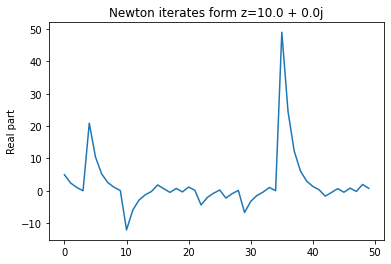

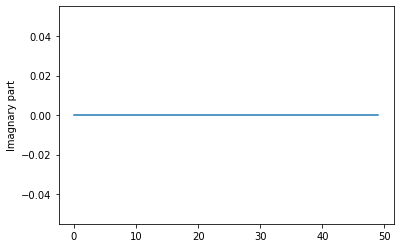

In [189]:
newton_iterations(10.0,0.0,f4,df4)

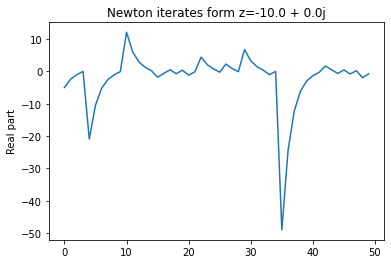

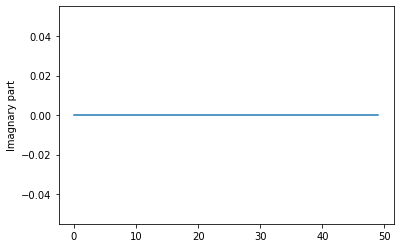

In [190]:
newton_iterations(-10.0,0.0,f4,df4)

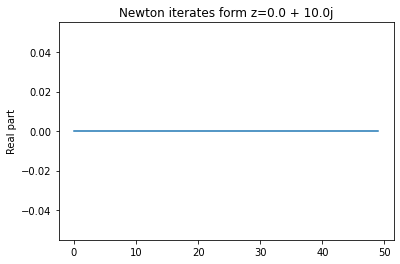

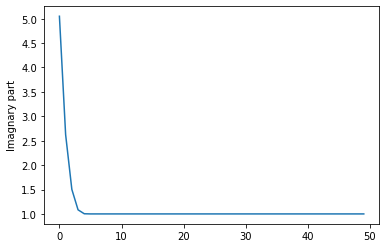

In [191]:
newton_iterations(0.0,10.0,f4,df4)

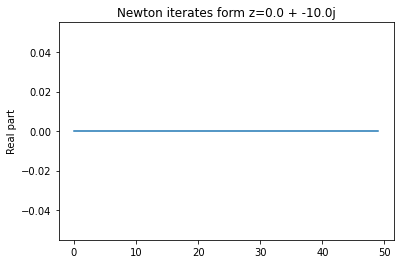

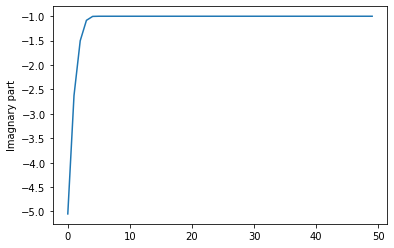

In [192]:
newton_iterations(0.0,-10.0,f4,df4)

Similar al caso anterior, la convergencia depende de la parte compleja y por lo tanto cuando se empieza por 10i ó -10i converge a i ó -i, pero cuando es 0i no puede converger a ningún valor y por ello se ve esa gráfica variante de la parte real.

## PUNTO 5

### $x^2$

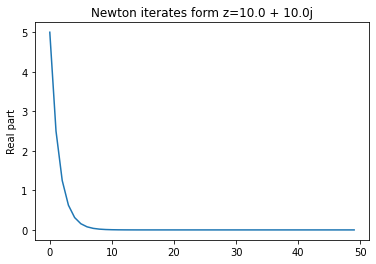

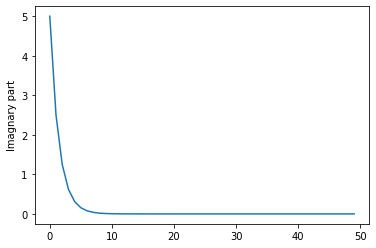

In [194]:
newton_iterations(10.0,10.0,f1,df1)

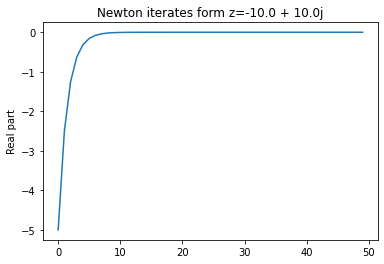

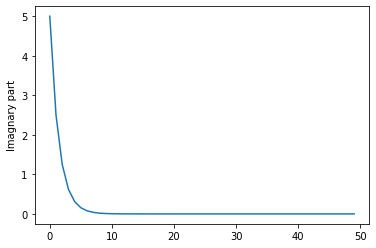

In [196]:
newton_iterations(-10.0,10.0,f1,df1)

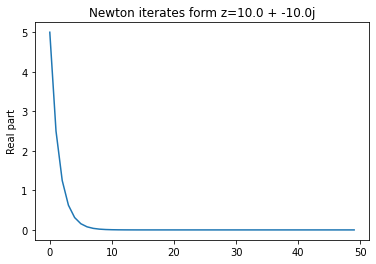

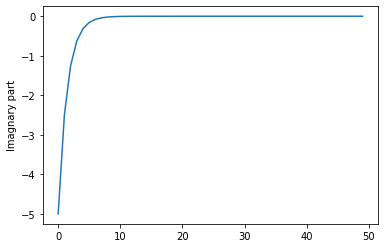

In [195]:
newton_iterations(10.0,-10.0,f1,df1)

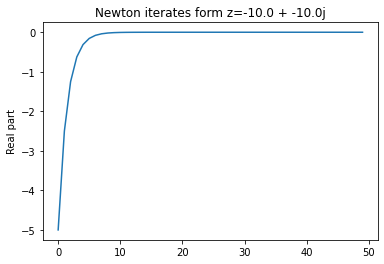

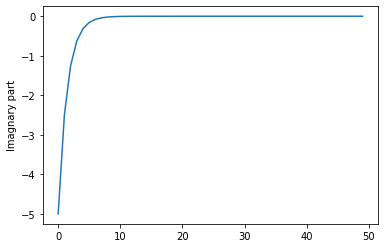

In [198]:
newton_iterations(-10.0,-10.0,f1,df1)

In [199]:
newton_iterations(0.0,0.0,f1,df1)

ZeroDivisionError: ignored

La unica raíz a la que puede converger es 0, y empezando desde cualquier punto de la diagonal se llegara converger. Usar 0 - 0j no podra funcionar ya que se evaluara f(x)/df(x) y como df = 2x, cuando los valores son 0 ocurre una division por cero.

### $(x-1)^2$

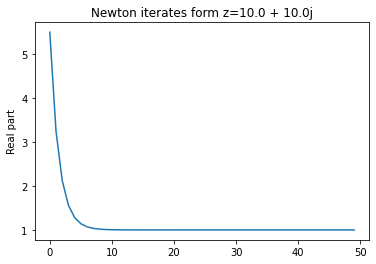

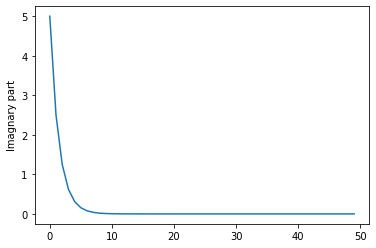

In [200]:
newton_iterations(10.0,10.0,f2,df2)

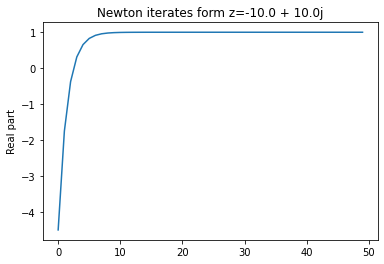

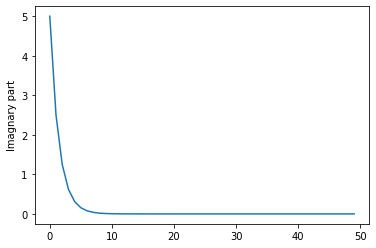

In [201]:
newton_iterations(-10.0,10.0,f2,df2)

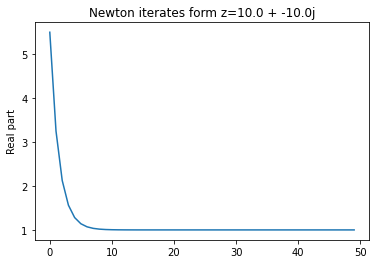

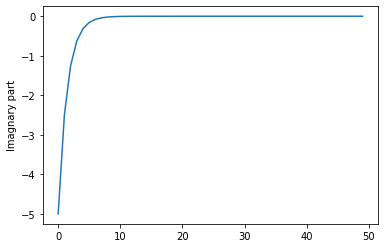

In [202]:
newton_iterations(10.0,-10.0,f2,df2)

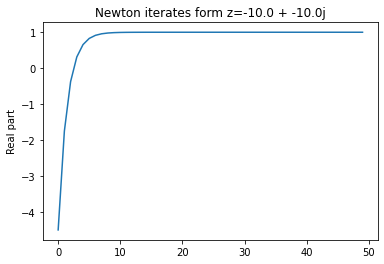

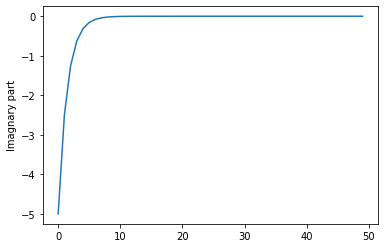

In [203]:
newton_iterations(-10.0,-10.0,f2,df2)

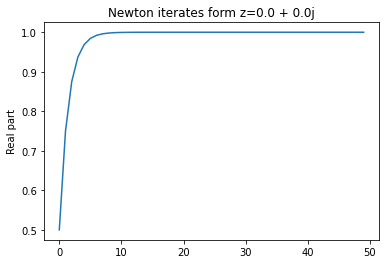

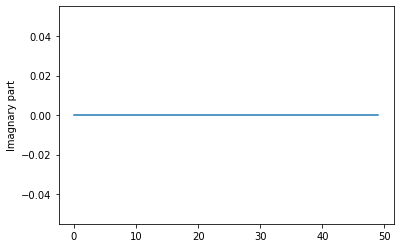

In [204]:
newton_iterations(0.0,0.0,f2,df2)

Como el anterior, solo tiene una única raíz a la que converger (1), pero en este caso si funciona usando 0 + 0j ya que df(x) = 2x - 2, por lo tanto no ocurre una división por 0.

### $x^2 - 1$

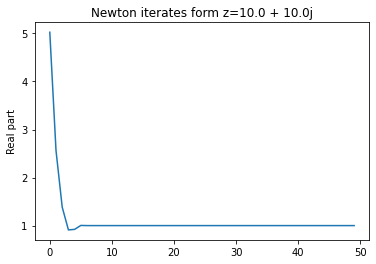

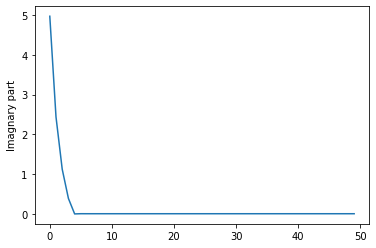

In [205]:
newton_iterations(10.0,10.0,f3,df3)

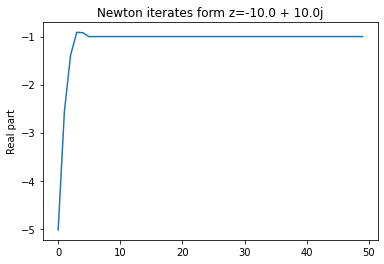

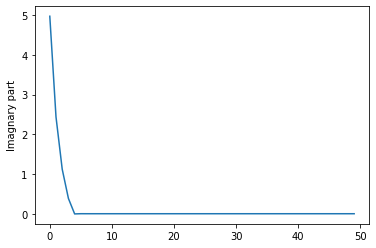

In [206]:
newton_iterations(-10.0,10.0,f3,df3)

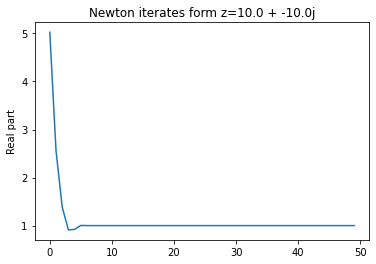

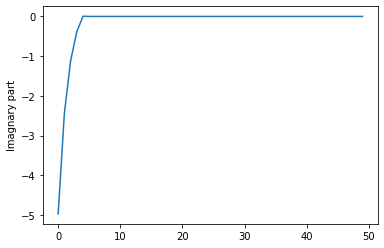

In [207]:
newton_iterations(10.0,-10.0,f3,df3)

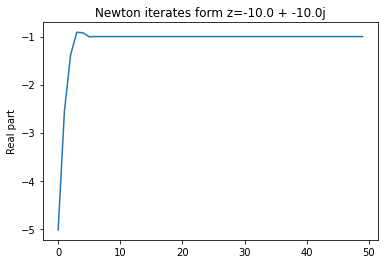

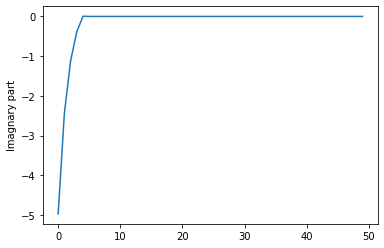

In [208]:
newton_iterations(-10.0,-10.0,f3,df3)

In [209]:
newton_iterations(0.0,0.0,f3,df3)

ZeroDivisionError: ignored

Como se menciono en el punto 4, la convergencia depende de la parte real y mientras esta no sea 0 va a poder a 1 si la parte real es mayor a 0 ó a -1 si la parte real es menor a 0. Se sabe que si es 0 no converge mirando la gráfica del punto 3. Como df = 2x, cuando es 0 + 0j ocurre una division por 0.

### $x^2 + 1$

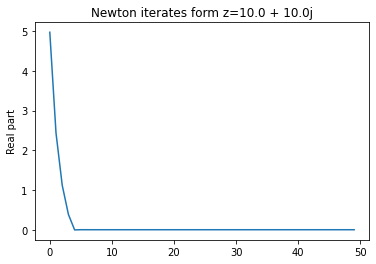

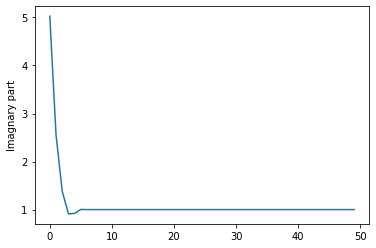

In [210]:
newton_iterations(10.0,10.0,f4,df4)

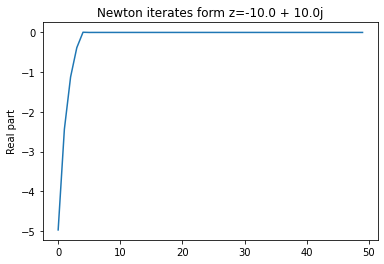

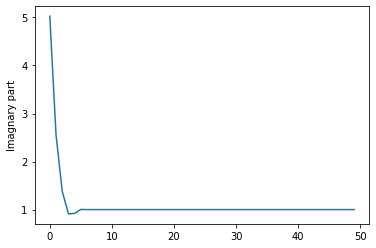

In [211]:
newton_iterations(-10.0,10.0,f4,df4)

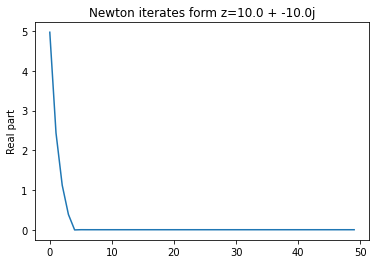

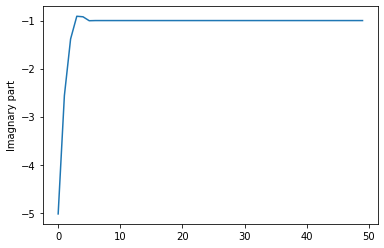

In [212]:
newton_iterations(10.0,-10.0,f4,df4)

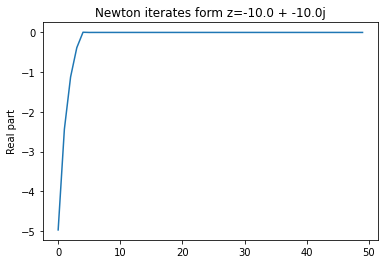

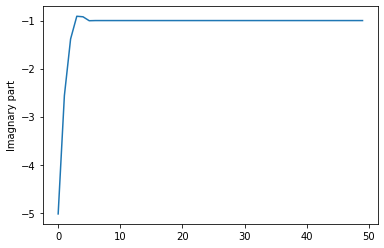

In [213]:
newton_iterations(-10.0,-10.0,f4,df4)

In [214]:
newton_iterations(0.0,0.0,f4,df4)

ZeroDivisionError: ignored

La convergencia depende solamente de la parte compleja y por lo tanto cuando es 10i ó -10i converge a i ó -i respectivamente sin importar el valor de la parte real. Se sabe por la gráfica del punto 3 y por el punto 4 que si la parte compleja es 0 entonces no converge. Como df = 2x cuando se usa 0 + 0j ocurre una división por 0.